# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key      

In [12]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=los llanos de aridane
Processing Record 2 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=punta arenas
Processing Record 3 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=sitka
Processing Record 4 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=kruisfontein
Processing Record 5 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=bonavista
Processing Record 6 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=saint-philippe
Processing Record 7 | Rikitea
http:

Processing Record 57 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=quatre cocos
Processing Record 58 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=ribeira grande
City not found. Skipping...
Processing Record 59 | Honningsvåg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=honningsvag
Processing Record 60 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=hilo
Processing Record 61 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=saskylakh
Processing Record 62 | Rogoźno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=rogozno
Processing Record 63 | Ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 113 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=katsuura
Processing Record 114 | Yayva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=yayva
Processing Record 115 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=tasiilaq
Processing Record 116 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=port alfred
Processing Record 117 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=bengkulu
City not found. Skipping...
Processing Record 118 | Salinópolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=salinopolis
City not found. Skipping...
City not found. Skipping...
Processing Record 119 | Klaksvík
http://

Processing Record 168 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=itarema
Processing Record 169 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=san cristobal
Processing Record 170 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=muros
Processing Record 171 | Valparaíso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=valparaiso
Processing Record 172 | Morón
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=moron
Processing Record 173 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=faanui
Processing Record 174 | Taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q

Processing Record 224 | Çermik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=cermik
Processing Record 225 | Basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=basco
Processing Record 226 | Hoopstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=hoopstad
City not found. Skipping...
Processing Record 227 | Roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=roebourne
Processing Record 228 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=vestmanna
Processing Record 229 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=maniitsoq
Processing Record 230 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a

Processing Record 280 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=pangnirtung
Processing Record 281 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=longyearbyen
Processing Record 282 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=richards bay
City not found. Skipping...
Processing Record 283 | Kroya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=kroya
Processing Record 284 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=oranjemund
Processing Record 285 | Benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=benguela
Processing Record 286 | Sur
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 336 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=trairi
Processing Record 337 | Pandharpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=pandharpur
Processing Record 338 | Bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=bintulu
Processing Record 339 | Andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=andenes
Processing Record 340 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=nantucket
Processing Record 341 | Muncar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=muncar
Processing Record 342 | Donskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=

Processing Record 392 | Braço do Norte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=braco do norte
Processing Record 393 | Tara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=tara
Processing Record 394 | Pio XII
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=pio xii
Processing Record 395 | Stonewall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=stonewall
Processing Record 396 | Shellbrook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=shellbrook
Processing Record 397 | Laas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=lasa
Processing Record 398 | Riohacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d

City not found. Skipping...
Processing Record 448 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=faya
City not found. Skipping...
Processing Record 449 | Tongchuanshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=tongchuan
Processing Record 450 | Hailey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=hailey
Processing Record 451 | Isfahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=esfahan
Processing Record 452 | Nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=nhulunbuy
Processing Record 453 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=cidreira
Processing Record 454 | Arrondissement de Carpentras
http://api.openweathermap.or

Processing Record 503 | Bom Jesus da Lapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=bom jesus da lapa
Processing Record 504 | Sept-Îles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=sept-iles
Processing Record 505 | Port Shepstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=port shepstone
Processing Record 506 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=maragogi
Processing Record 507 | Reconquista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=reconquista
Processing Record 508 | Doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=doha
Processing Record 509 | Bay City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 559 | Cherepovets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=cherepovets
Processing Record 560 | Ürümqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=urumqi
Processing Record 561 | Smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=smithers
Processing Record 562 | Colorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=colorado
Processing Record 563 | Ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=ballina
Processing Record 564 | Dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e24e77a3beec00053c3f86b8d112d201&q=dudinka


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [26]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Los Llanos de Aridane,65,ES,1595120687,69,28.66,-17.92,82.00,8.05
1,Punta Arenas,99,CL,1595120689,80,-53.15,-70.92,35.01,13.87
2,Sitka,90,US,1595120690,93,57.05,-135.33,57.20,9.17
3,Kruisfontein,0,ZA,1595120691,79,-34.00,24.73,50.67,5.77
4,Bonavista,100,CA,1595120692,67,48.65,-53.11,54.45,4.79


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
weather_data[weather_data.Humidity <= 100]
# no humidity over 100, same amount of observations

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Los Llanos de Aridane,65,ES,1595120687,69,28.66,-17.92,82.00,8.05
1,Punta Arenas,99,CL,1595120689,80,-53.15,-70.92,35.01,13.87
2,Sitka,90,US,1595120690,93,57.05,-135.33,57.20,9.17
3,Kruisfontein,0,ZA,1595120691,79,-34.00,24.73,50.67,5.77
4,Bonavista,100,CA,1595120692,67,48.65,-53.11,54.45,4.79
...,...,...,...,...,...,...,...,...,...
559,Ürümqi,100,CN,1595121398,28,43.80,87.60,86.00,4.47
560,Smithers,75,CA,1595121245,77,54.78,-127.17,64.40,4.70
561,Colorado,0,BR,1595121400,63,-22.84,-51.97,67.37,8.81
562,Ballina,0,AU,1595121401,68,-28.87,153.57,66.99,6.93


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

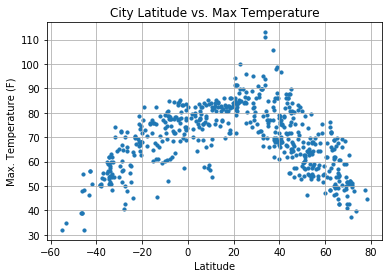

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

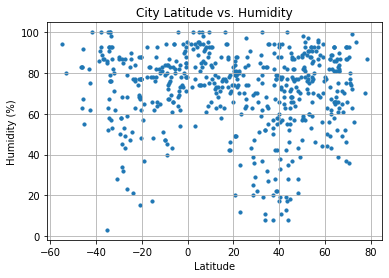

In [59]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('City Latitude vs. Humidity.png')

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

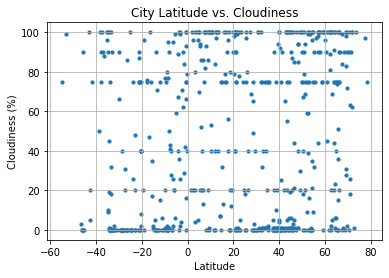

In [60]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

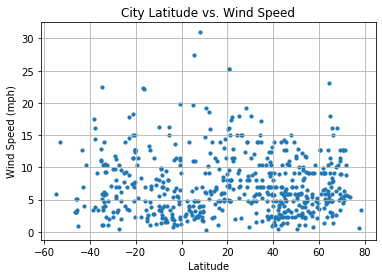

In [61]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [37]:
# Create Northern and Southern Hemisphere DataFrames
#Create Northern Hemisphere
north = weather_data[weather_data.Lat >= 0]
north

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Los Llanos de Aridane,65,ES,1595120687,69,28.66,-17.92,82.00,8.05
2,Sitka,90,US,1595120690,93,57.05,-135.33,57.20,9.17
4,Bonavista,100,CA,1595120692,67,48.65,-53.11,54.45,4.79
9,Marawi,0,PH,1595120699,78,8.00,124.29,82.99,3.00
10,College,75,US,1595120700,68,64.86,-147.80,66.20,9.17
...,...,...,...,...,...,...,...,...,...
556,Kantunilkín,75,MX,1595121394,79,21.09,-87.45,84.20,4.70
558,Cherepovets,0,RU,1595121396,88,59.13,37.90,54.39,5.19
559,Ürümqi,100,CN,1595121398,28,43.80,87.60,86.00,4.47
560,Smithers,75,CA,1595121245,77,54.78,-127.17,64.40,4.70


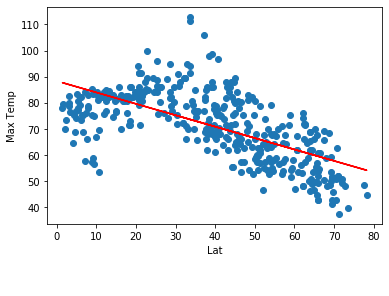

In [62]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.savefig("Northern_Hemisphere_Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [46]:
model=linregress(north['Max Temp'],north['Lat'],)
model

LinregressResult(slope=-0.9654303763316863, intercept=108.1798202063301, rvalue=-0.6493244699070988, pvalue=1.0487355278914189e-47, stderr=0.05762814061661971)

In [38]:
#Create Southern Hemisphere
south = weather_data[weather_data.Lat <= 0]
south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Punta Arenas,99,CL,1595120689,80,-53.15,-70.92,35.01,13.87
3,Kruisfontein,0,ZA,1595120691,79,-34.00,24.73,50.67,5.77
5,Saint-Philippe,75,RE,1595120694,68,-21.36,55.77,66.20,11.41
6,Rikitea,48,PF,1595120695,84,-23.12,-134.97,69.93,14.56
7,Vaini,75,TO,1595120696,88,-21.20,-175.20,78.80,14.99
...,...,...,...,...,...,...,...,...,...
549,Atambua,0,ID,1595121385,45,-9.11,124.89,80.28,1.36
555,Pontes e Lacerda,1,BR,1595121393,48,-15.23,-59.34,75.63,1.66
557,Kamina,0,CD,1595121395,72,-8.74,24.99,52.05,6.91
561,Colorado,0,BR,1595121400,63,-22.84,-51.97,67.37,8.81


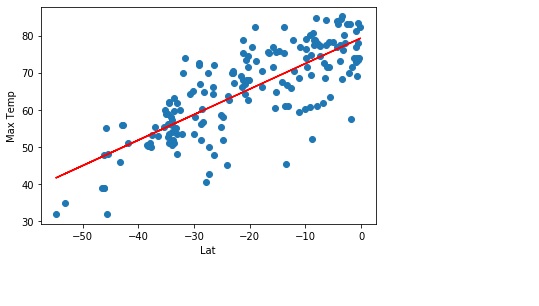

In [63]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.savefig("Southern_Hemisphere_Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [48]:
model=linregress(south['Max Temp'],south['Lat'],)
model

LinregressResult(slope=0.8843662355720983, intercept=-78.19674203928477, rvalue=0.7788734859725533, pvalue=2.694768652303315e-37, stderr=0.05383183071300283)

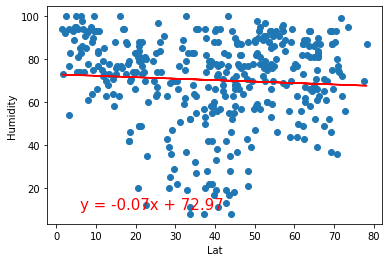

In [64]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()



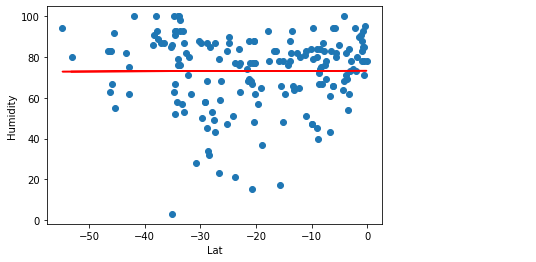

In [65]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()


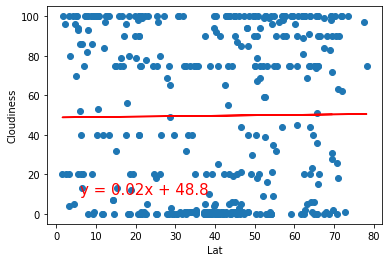

In [66]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()


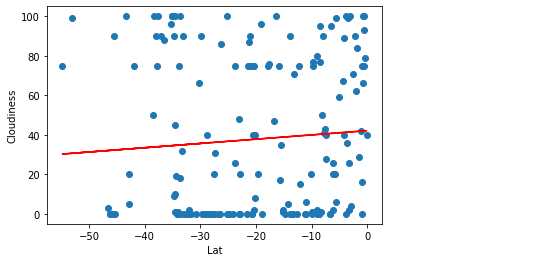

In [67]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

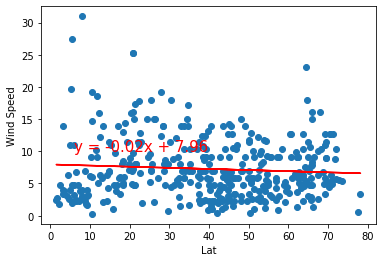

In [68]:
#Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.savefig("Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression.png")
plt.show()

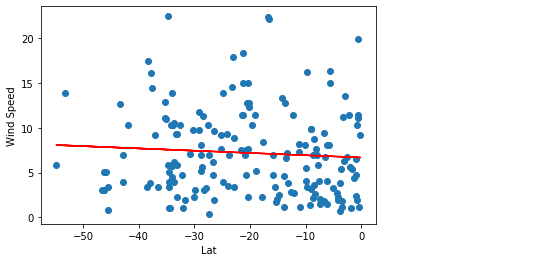

In [69]:
#Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')

plt.savefig("Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression.png")
plt.show()